In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)

2.3.0


170500096/170498071 [==============================] - 2s 0us/step
train: (50000, 32, 32, 3) (50000, 1)
test: (10000, 32, 32, 3) (10000, 1)
y train: [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
y test: [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


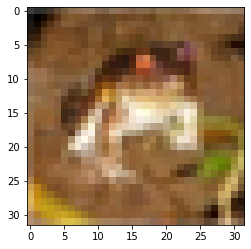

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('train:', x_train.shape, y_train.shape)
print('test:', x_test.shape, y_test.shape)
print('y train:', y_train[:10])
print('y test:', y_test[:10])

plt.imshow(x_train[0, :, :])

In [11]:
def list_to_onehot(x, num_class=10):
  onehot = np.zeros([x.shape[0], num_class], dtype=np.float64)
  onehot[np.arange(x.shape[0]), x[:, 0].astype(int)] = 1.0
  return onehot

def split_train_val(x, y, rate_train=0.7):
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)
  i = int(x.shape[0]*rate_train)
  return (x[indices[:i]], y[indices[:i]]), (x[indices[i:]], y[indices[i:]])

preprocess_samples = lambda x : x / 255.

(x_train, y_train), (x_val, y_val) = split_train_val(x_train, y_train)
x_train = preprocess_samples(x_train)
x_val = preprocess_samples(x_val)
x_test = preprocess_samples(x_test)

y_train = list_to_onehot(y_train)
y_val = list_to_onehot(y_val)
y_test = list_to_onehot(y_test)
for it in y_train[:10]:
  print(it)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
model = tf.keras.models.Sequential(name='simple_dnn')
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Softmax())
model.summary()

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model: "simple_dnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=8,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/8
192/192 [==============================] - 3s 16ms/step - loss: 1.6074 - accuracy: 0.8803 - val_loss: 1.5583 - val_accuracy: 0.9031
Epoch 2/8
192/192 [==============================] - 4s 21ms/step - loss: 1.5605 - accuracy: 0.8994 - val_loss: 1.5544 - val_accuracy: 0.9031
Epoch 3/8
192/192 [==============================] - 4s 23ms/step - loss: 1.5569 - accuracy: 0.8994 - val_loss: 1.5510 - val_accuracy: 0.9031
Epoch 4/8
192/192 [==============================] - 3s 14ms/step - loss: 1.5523 - accuracy: 0.8994 - val_loss: 1.5469 - val_accuracy: 0.9031
Epoch 5/8
192/192 [==============================] - 3s 14ms/step - loss: 1.5485 - accuracy: 0.8994 - val_loss: 1.5438 - val_accuracy: 0.9031
Epoch 6/8
192/192 [==============================] - 3s 14ms/step - loss: 1.5458 - accuracy: 0.8994 - val_loss: 1.5404 - val_accuracy: 0.9031
Epoch 7/8
192/192 [==============================] - 3s 14ms/step - loss: 1.5436 - accuracy: 0.8994 - val_loss: 1.5388 - val_accuracy: 0.9031
Epoch 

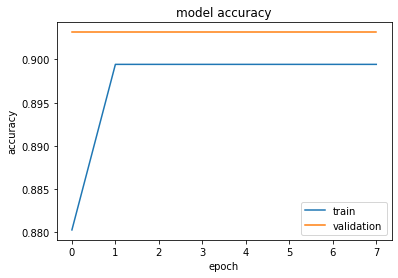

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

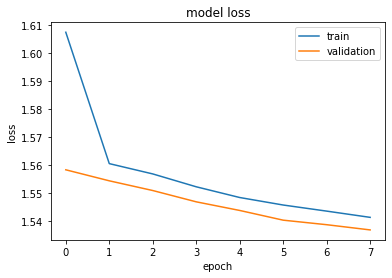

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [17]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5361 - accuracy: 0.9000
